# Анализ данных интернет-магазина 

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

Цель: необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
Нужно отработать принцип работы с данными: спрогнозировать продажи на 2017 год по данным 2016-го.

Описание данных: 

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


План работы:
    
    ШАГ 1. Открыть файл с данными и изучить общую информацию
    
    ШАГ 2. Подготовка данных
    
    ШАГ 3. Провести исследовательский анализ данных
    
    ШАГ 4. Составить портрет пользователя каждого региона
    
    ШАГ 5. Проверить гипотезы
    
    ШАГ 6. Написать общий вывод

<h1>СОДЕРЖАНИЕ<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ШАГ-1" data-toc-modified-id="ШАГ-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ШАГ 1</a></span></li><li><span><a href="#ШАГ-2" data-toc-modified-id="ШАГ-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ШАГ 2</a></span></li><li><span><a href="#ШАГ-3" data-toc-modified-id="ШАГ-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ШАГ 3</a></span></li><li><span><a href="#ШАГ-4" data-toc-modified-id="ШАГ-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ШАГ 4</a></span></li><li><span><a href="#ШАГ-5" data-toc-modified-id="ШАГ-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ШАГ 5</a></span></li><li><span><a href="#ШАГ-6" data-toc-modified-id="ШАГ-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ШАГ 6</a></span></li></ul></div>

## ШАГ 1

Импортируем необходимые библиотеки и загрузим данные:

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/Users/vladamalkina/Downloads/games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обнаружены пропуски в следующих столбцах: 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score', 'Rating'. Требуется предобработка данных, работа с пропусками.

## ШАГ 2

Заполним пропуски в данных, где это возможно:

In [4]:
data = data.rename(columns = str.lower)

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
data = data.dropna(subset = ['name','year_of_release','genre'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Невозможно заполнить пропуски в следующих столбцах: name, year_of_release, genre, rating. Доля пропусков в столбцах name, year_of_release, genre мала, поэтому можно удалить строки с пропусками в этих столбцах.

In [7]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [9]:
platform_sort = data.groupby('platform')['critic_score'].median().isna()
choose_platforms = []
for i in data['platform'].unique():
    if platform_sort[i]==False:
        choose_platforms.append(i)

In [10]:
for platform in choose_platforms:
    data.loc[(data['platform']==platform)&(data['critic_score'].isnull()), 'critic_score'] = data.loc[data['platform']==platform, 'critic_score'].median()
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1097
user_score         8981
rating             6676
dtype: int64

Заполнили пропуски в critic_score: рассортировали по платформам, нашли медианное значение для каждой платформы и заполнили им пропуски. У некоторых платформ медианное значение NaN, то есть нет данных ни по одной игре в столбце 'critic_score'. Эти пропуски заполнить не удалось.

In [11]:
user_group = data.loc[data['user_score'].isna()==False]
for platform in user_group['platform'].unique():
    data.loc[(data['platform']==platform)&(data['user_score'].isnull()), 'user_score'] = user_group.loc[user_group['platform']==platform, 'user_score'].median()
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1097
user_score         1097
rating             6676
dtype: int64

По аналогии с заполнением 'critic_score' заполнили пропуски в столбце 'user_score'.

In [12]:
print(data['name'].nunique())
print(data['name'].value_counts())

11426
Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                   9
Ratatouille                                9
FIFA 14                                    9
Terraria                                   8
                                          ..
Loving Life with Hello Kitty & Friends     1
Scrabble (Others sales)                    1
Viva Pinata: Party Animals                 1
Sands of Destruction                       1
Haitaka no Psychedelica                    1
Name: name, Length: 11426, dtype: int64


In [13]:
data = data.drop_duplicates(subset = ['name', 'platform', 'year_of_release'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     15346 non-null  float64
 9   user_score       15346 non-null  float64
 10  rating           9767 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [14]:
data['rating'] = data['rating'].fillna('Unknown')

Из-за сбоя автоматизированной системы сбора информации образовались пропуски в столбцах 'critic_score', 'user_score', 'rating'; пропуски в столбцах 'name', 'year_of_release', 'genre' образовались из-за человеческого фактора.

суммарные продажи во всех регионах:

In [15]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

## ШАГ 3

In [16]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     652
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Для прогноза на 2017 год не понадобятся данные за весь период, достаточно взять данные за последние 10 лет.

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
Name: sum_sales, dtype: float64


<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

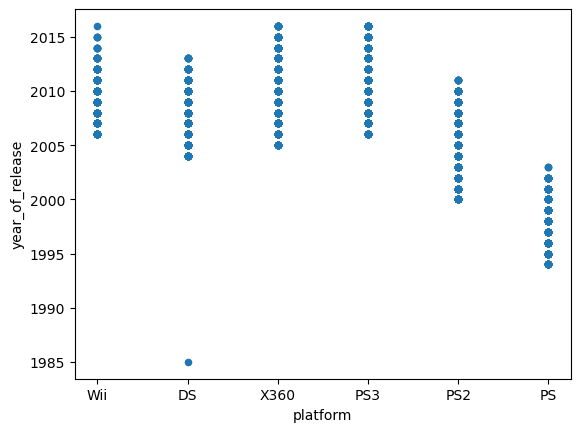

In [17]:
sort_platf = data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(6)
print(sort_platf)
new_data = data.query('platform == "PS2" | platform == "X360" | platform == "PS3" | platform == "Wii" | platform == "DS" | platform == "PS"')
new_data.plot(x = 'platform',y='year_of_release',kind='scatter')

Каждые 10 лет появляются новые и исчезают старые платформы.

In [18]:
data_period = data.query('year_of_release >= 2012')

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
Name: sum_sales, dtype: float64


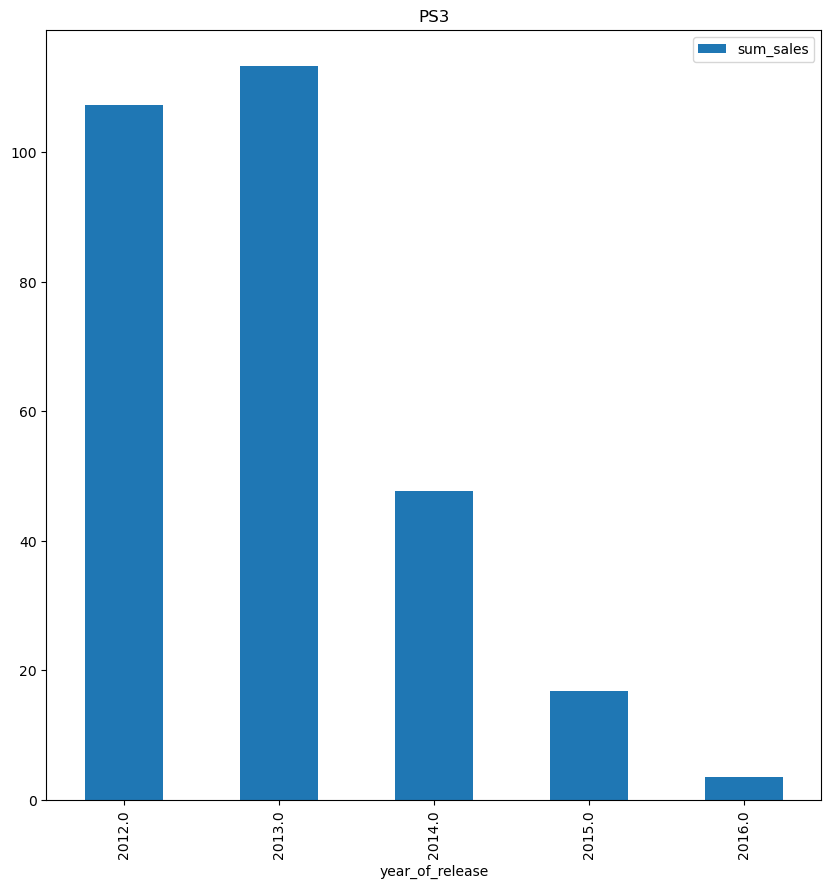

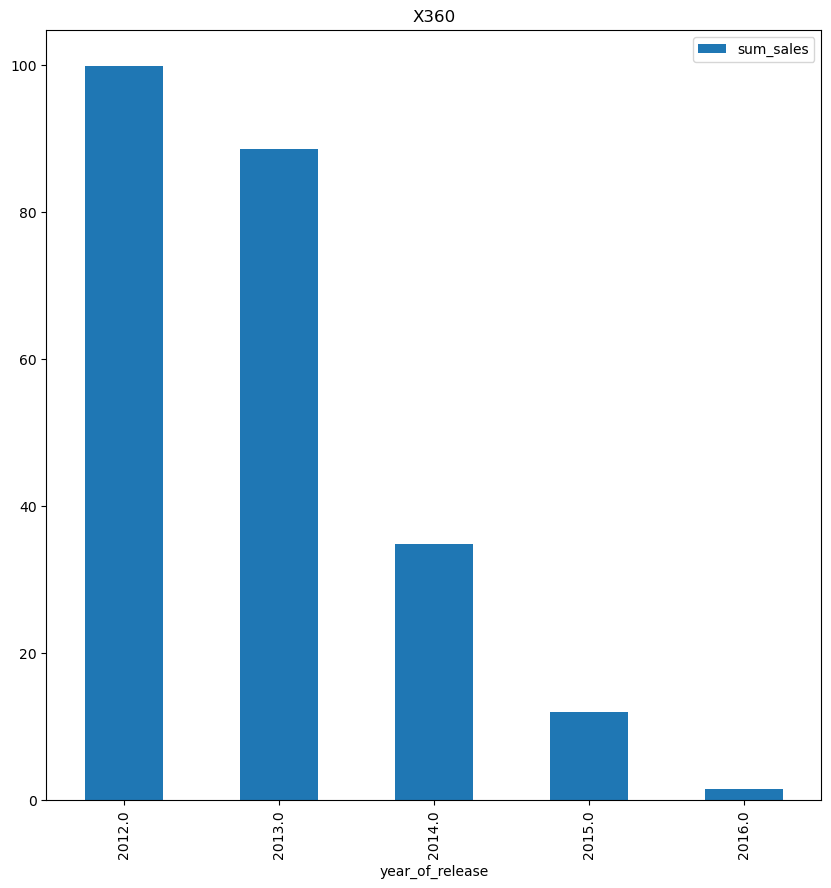

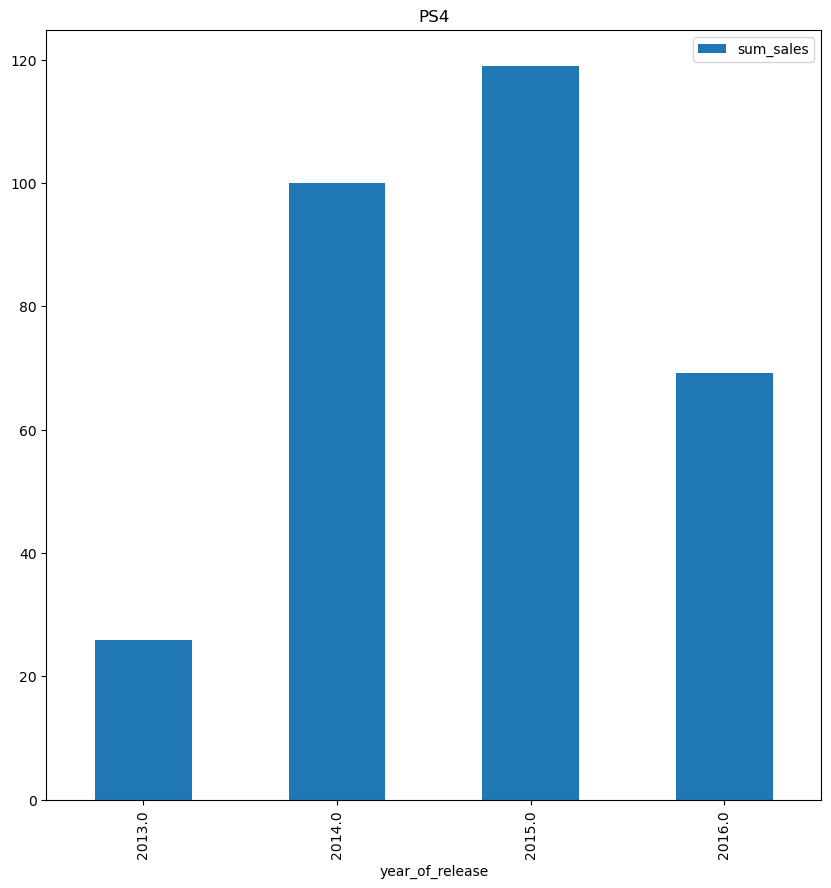

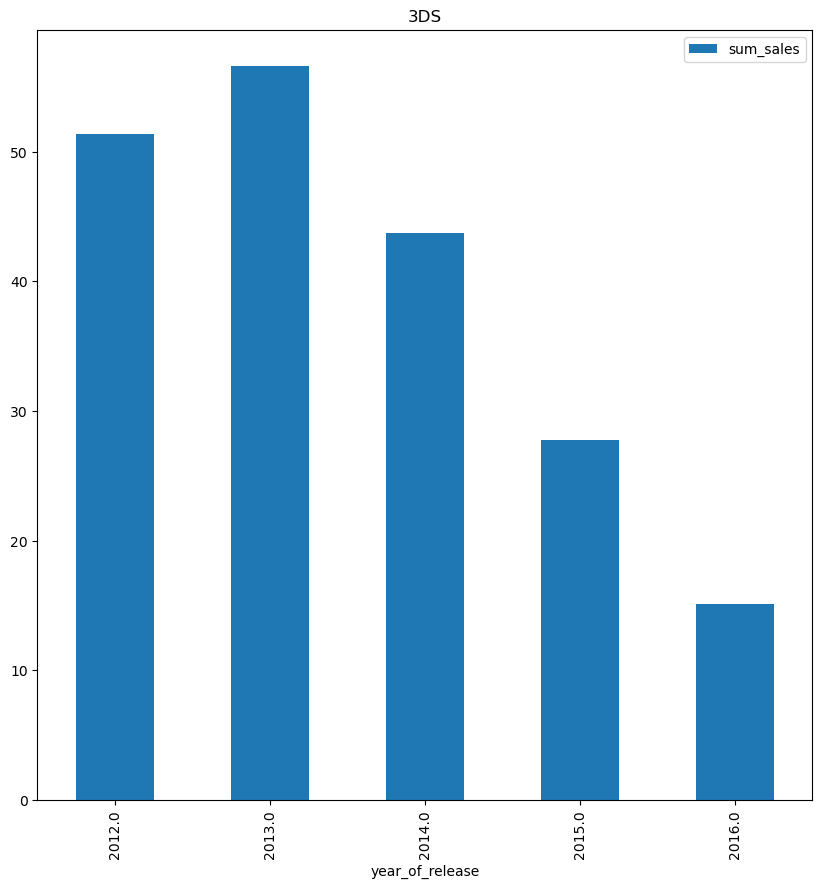

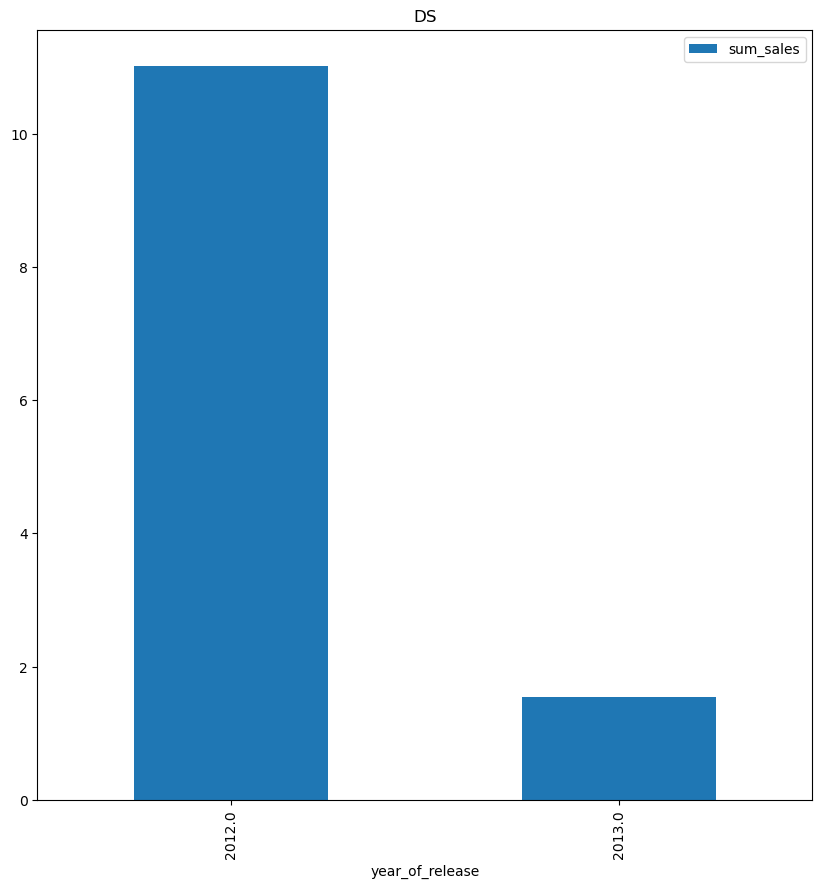

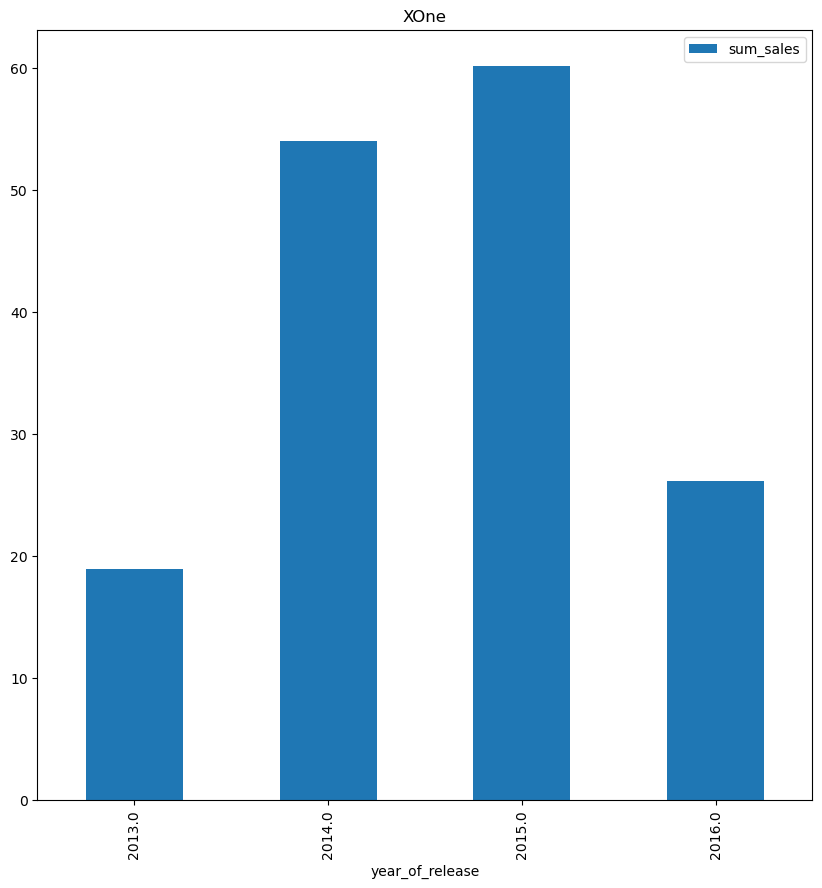

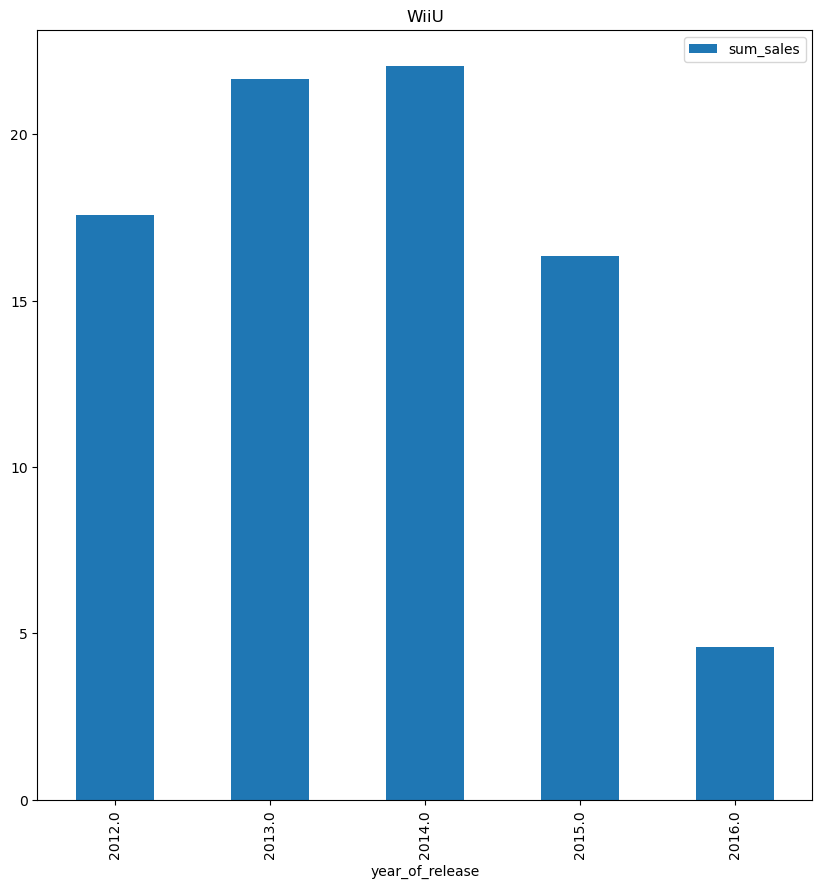

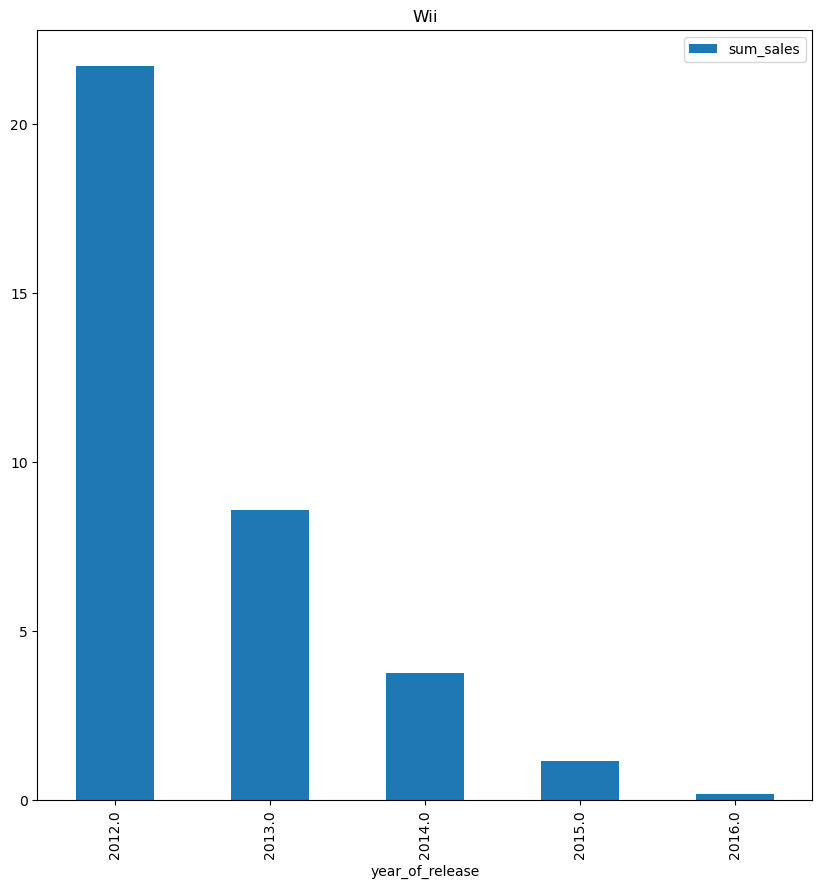

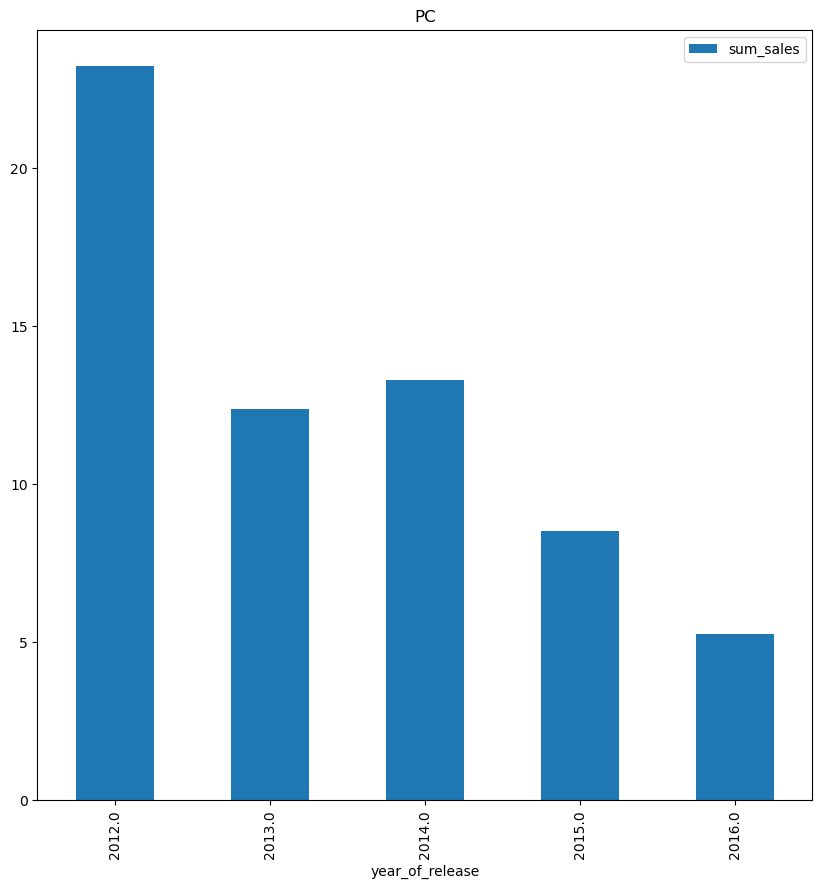

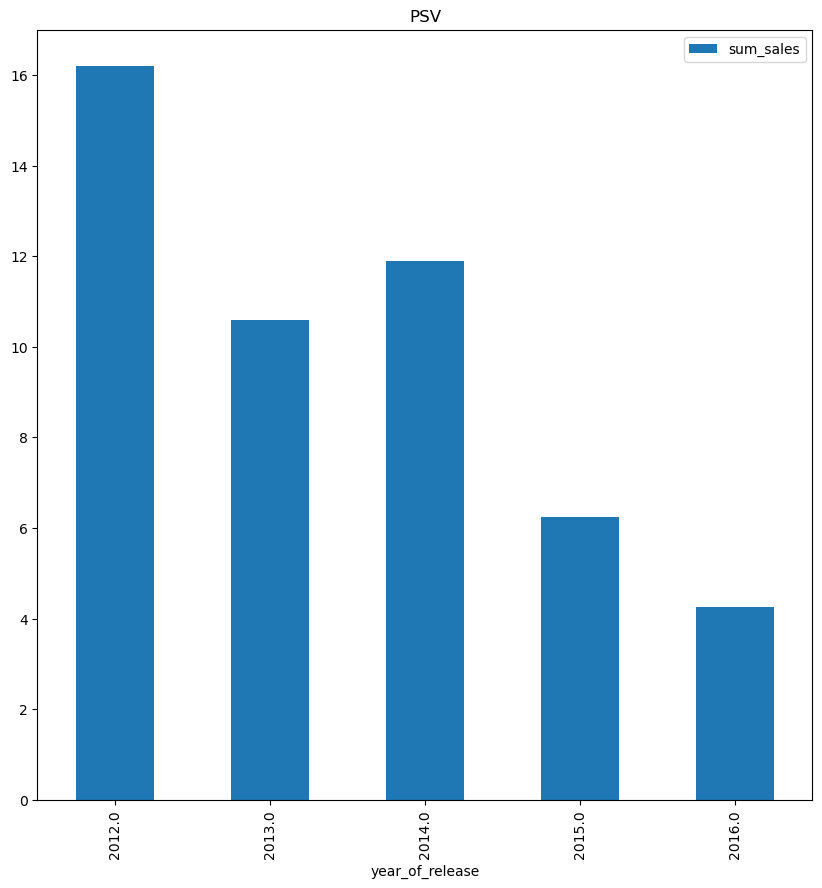

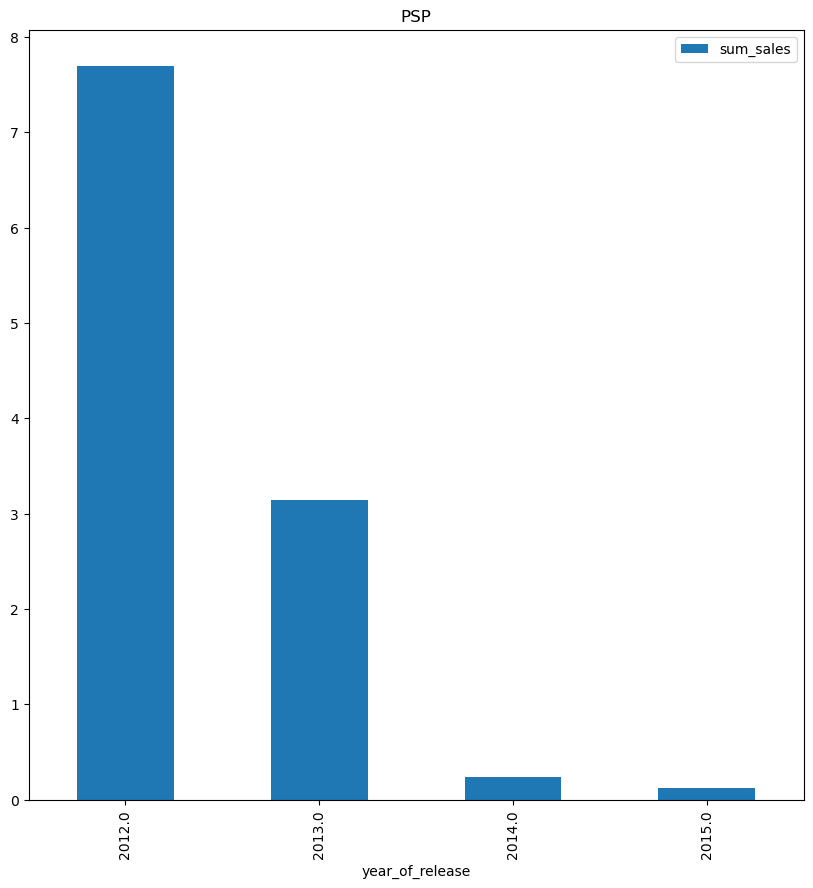

In [19]:
print(data_period.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head())
for platform in data_period['platform'].unique():
    data_graphic = data_period.loc[data_period['platform']==platform]
    data_period_pivot = data_graphic.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
    data_period_pivot.plot(kind='bar', title = platform, figsize = (10, 10))

Платформы PS4, 3DS, PS3, X360, WiiU лидируют по продажам за последние 5 лет.
PS4 является потенциально прибыльной платформой.
Продажи PS3, X360, Wii, XOne, PSV упали к 2016 году.
Последние продажи DS, PSP были в 2013 и 2015 годах соответственно.

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

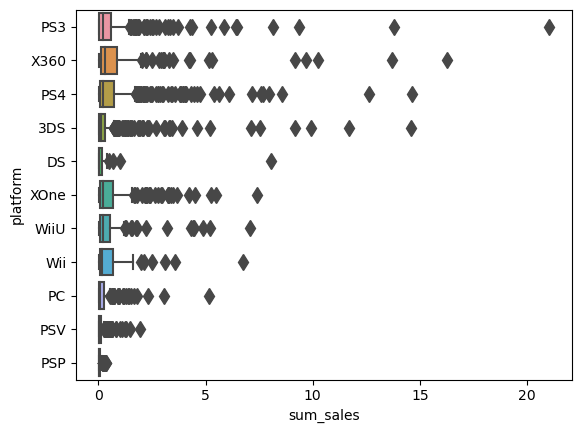

In [20]:
seaborn.boxplot(data = data_period, x = 'sum_sales', y = 'platform', fliersize = 8, whis = 1.5)

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

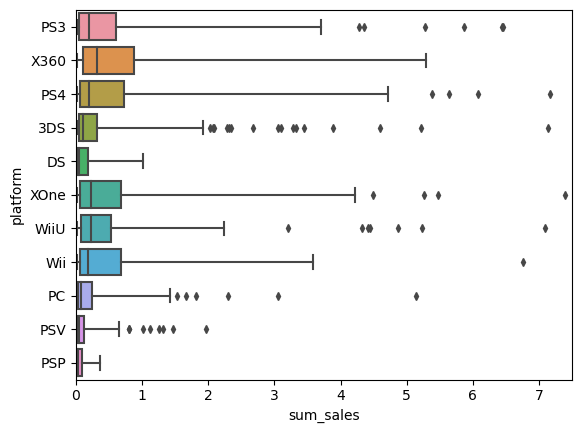

In [21]:
plt.xlim(0, 7.5)
seaborn.boxplot(data = data_period, x = 'sum_sales', y = 'platform', fliersize = 4, whis = 6)

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

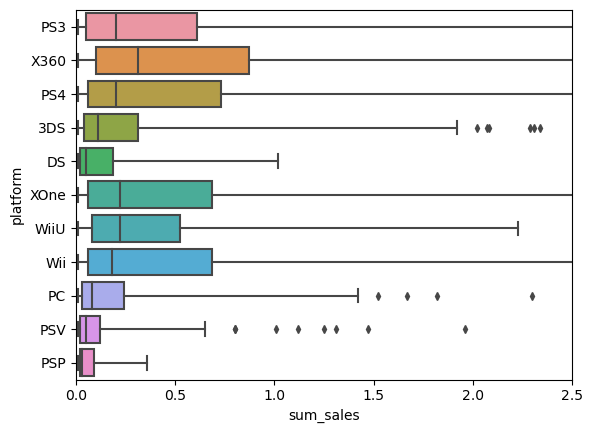

In [22]:
plt.xlim(0, 2.5)
seaborn.boxplot(data = data_period, x = 'sum_sales', y = 'platform', fliersize = 4, whis = 6)

Лидирующие платформы: Wii, X360, XOne, PS4.
Платформы с низкими продажами: PSP, PSV, DS.

'Корреляция между оценками критиков и глобальными продажами'

0.32534576345022587

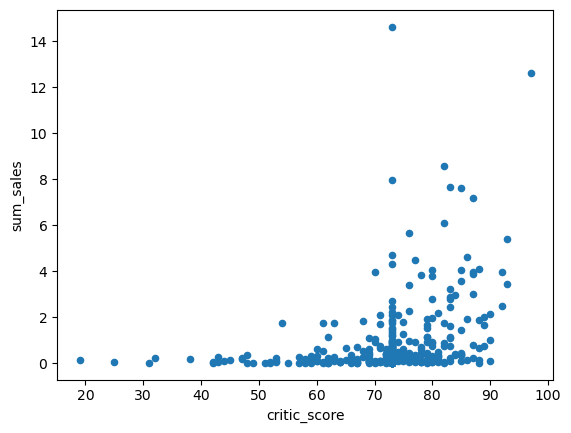

In [23]:
data_period_new = data_period.query('platform == "PS4"')
data_period_new.plot(x='critic_score', y='sum_sales', kind='scatter')
display('Корреляция между оценками критиков и глобальными продажами',data_period_new['critic_score'].corr(data_period_new['sum_sales']))

'Корреляция между оценками пользователей и глобальными продажами'

-0.03915354316293709

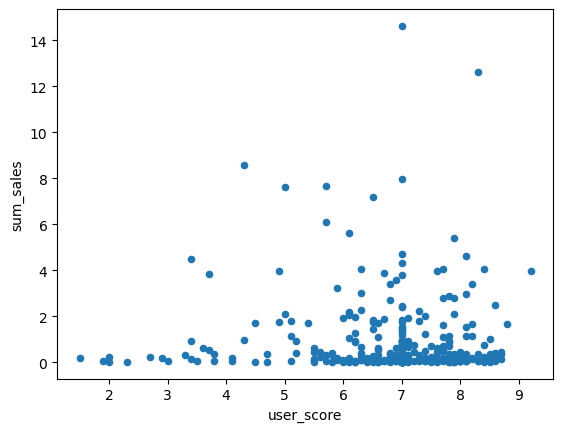

In [24]:
data_period_new.plot(x='user_score', y='sum_sales', kind='scatter')
display('Корреляция между оценками пользователей и глобальными продажами',data_period_new['user_score'].corr(data_period_new['sum_sales']))

На примере PS4 можно убедиться, что продажи платформы не зависят от оценок пользователей(корреляция ~ -0.1) и оценки критиков(корреляция ~ 0.3).

Платформа PC :


'Корреляция между оценками критиков и глобальными продажами '

0.21501712276536017

'Корреляция между оценками пользователей и глобальными продажами '

-0.1463344468236837

Платформа XOne :


'Корреляция между оценками критиков и глобальными продажами '

0.3209255677947712

'Корреляция между оценками пользователей и глобальными продажами '

-0.07325882509794278

Платформа WiiU :


'Корреляция между оценками критиков и глобальными продажами '

0.2838943045756463

'Корреляция между оценками пользователей и глобальными продажами '

0.34910403123685096

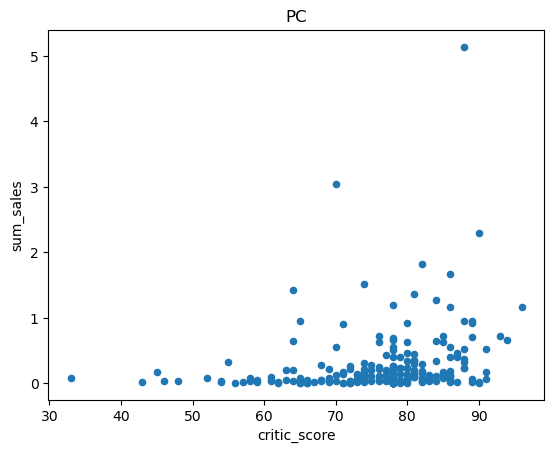

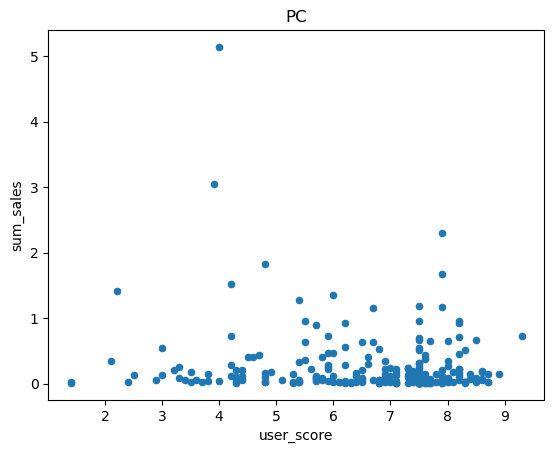

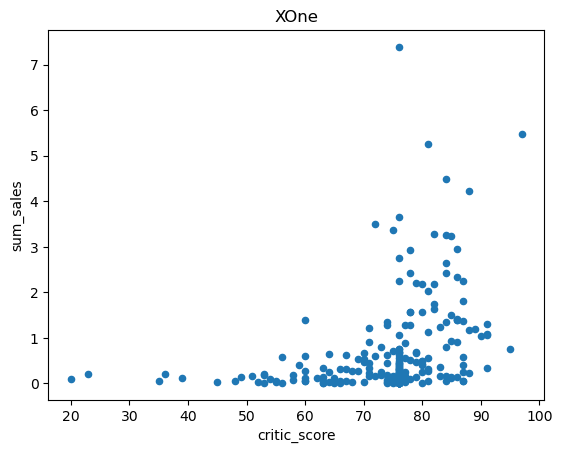

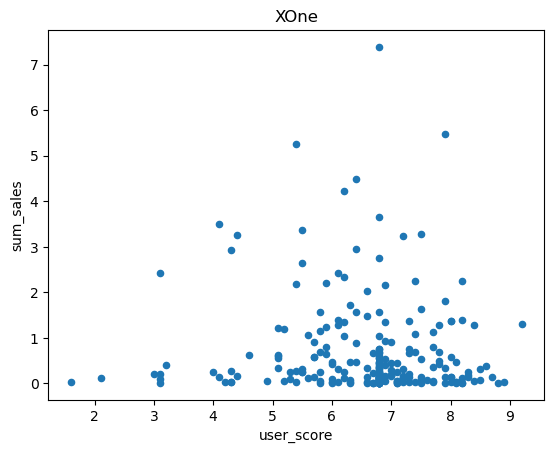

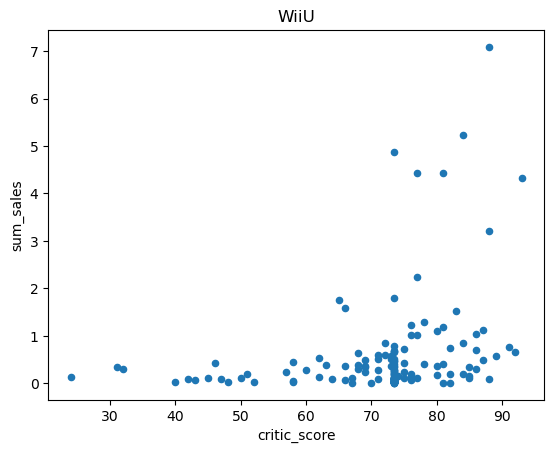

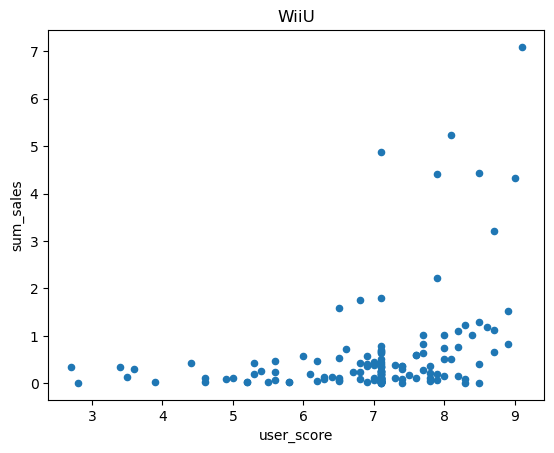

In [25]:
def func_sales(data_period, plat):
    data_period_new = data_period.query('platform == @plat')
    
    data_period_new.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', title = plat)
    display('Корреляция между оценками критиков и глобальными продажами ', data_period_new['critic_score'].corr(data_period_new['sum_sales']))
    
    data_period_new.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', title = plat)
    display('Корреляция между оценками пользователей и глобальными продажами ', data_period_new['user_score'].corr(data_period_new['sum_sales']))

list_plat = ['PC', 'XOne', 'WiiU']
for i in list_plat:
    print('Платформа', i, ':')
    func_sales(data_period, i)

На примере других платформ убедились в слабой связи между продажами и оценками пользователей и критиков.

<AxesSubplot:xlabel='genre'>

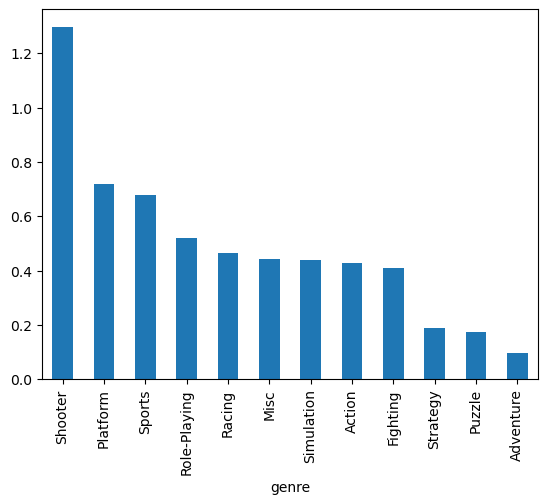

In [26]:
(data_period.groupby('genre')['sum_sales'].sum()/data_period.groupby('genre')['sum_sales'].count()).sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='sum_sales', ylabel='genre'>

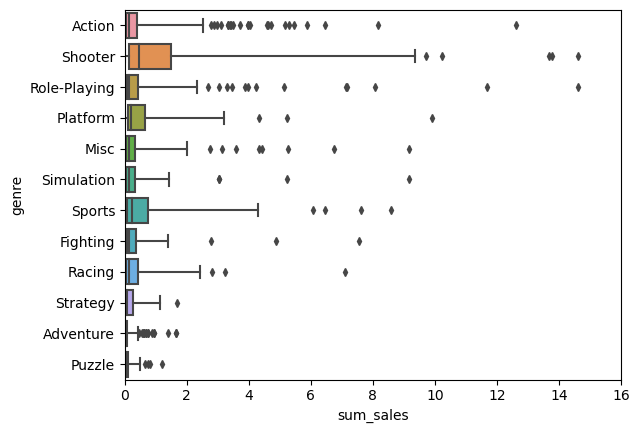

In [27]:
plt.xlim(0, 16)
seaborn.boxplot(data = data_period, x = 'sum_sales', y = 'genre', fliersize = 4, whis = 6)

<AxesSubplot:xlabel='sum_sales', ylabel='genre'>

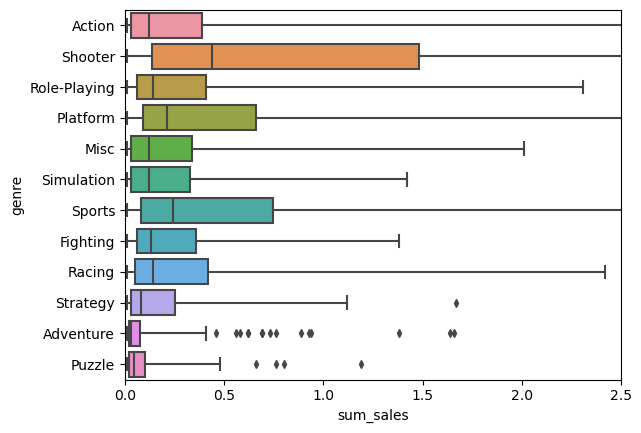

In [28]:
plt.xlim(0, 2.5)
seaborn.boxplot(data = data_period, x = 'sum_sales', y = 'genre', fliersize = 4, whis = 6)

Самыми прибыльными жанрами являются Shooter, Platform, Racing и Sports.
Жанры с низкими продажами: Puzzle, Adventure, Strategy.

## ШАГ 4

In [29]:
def popular_platforms_genres(data, region, columns):
    return (data.groupby(columns)[region].sum()/data[region].sum()).sort_values(ascending = False)
    

list_regions = ['na_sales','eu_sales','jp_sales']
list_column = ['platform','genre']
for i in list_regions:
    print('для региона', i, ':')
    for j in list_column:
        sales = popular_platforms_genres(data_period, i, j)
        print(sales.head())

для региона na_sales :
platform
X360    0.236983
PS4     0.184003
PS3     0.174933
XOne    0.157571
3DS     0.093592
Name: na_sales, dtype: float64
genre
Action          0.300929
Shooter         0.244970
Sports          0.137960
Role-Playing    0.108297
Misc            0.064623
Name: na_sales, dtype: float64
для региона eu_sales :
platform
PS4     0.278388
PS3     0.210829
X360    0.147037
XOne    0.101794
3DS     0.084134
Name: eu_sales, dtype: float64
genre
Action          0.314398
Shooter         0.223891
Sports          0.136304
Role-Playing    0.095756
Racing          0.053847
Name: eu_sales, dtype: float64
для региона jp_sales :
platform
3DS     0.455862
PS3     0.183249
PSV     0.109253
PS4     0.082875
WiiU    0.067556
Name: jp_sales, dtype: float64
genre
Role-Playing    0.339807
Action          0.274172
Misc            0.066777
Simulation      0.054055
Fighting        0.049019
Name: jp_sales, dtype: float64


Доли продажи платформ в Северной Америке и Европе схожи. Доли продажи платформ в Японии отличаются от Северной Америки и Европы. Различие в долях продаж можно объяснить различиями в культуре и менталитете разных стран и континентов. 
Сильных отличий в доле продаж по жанрам не наблюдается.

<AxesSubplot:title={'center':'na_sales'}, xlabel='rating'>

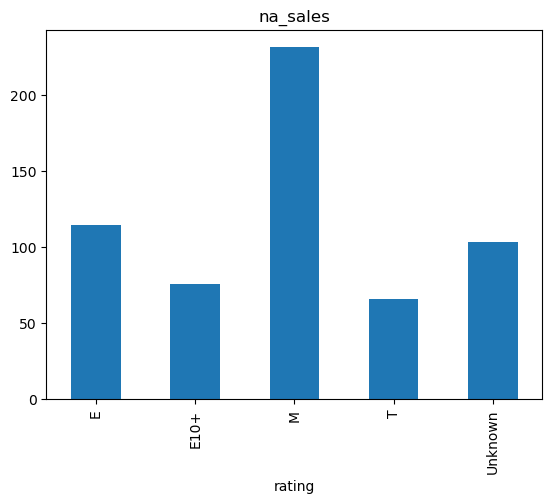

In [30]:
data_period.groupby('rating')['na_sales'].sum().plot(kind = 'bar', title = 'na_sales')

<AxesSubplot:title={'center':'eu_sales'}, xlabel='rating'>

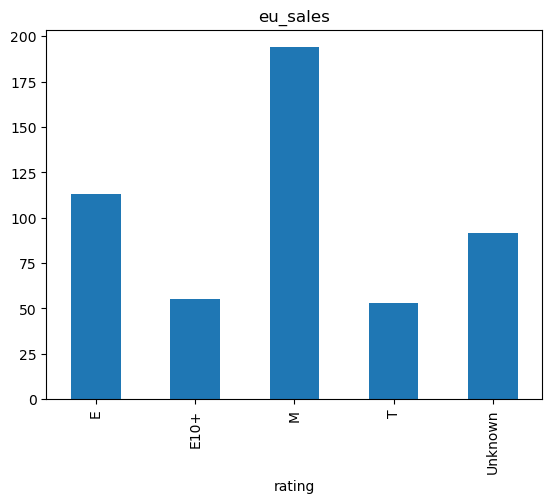

In [31]:
data_period.groupby('rating')['eu_sales'].sum().plot(kind = 'bar', title = 'eu_sales')

<AxesSubplot:title={'center':'jp_sales'}, xlabel='rating'>

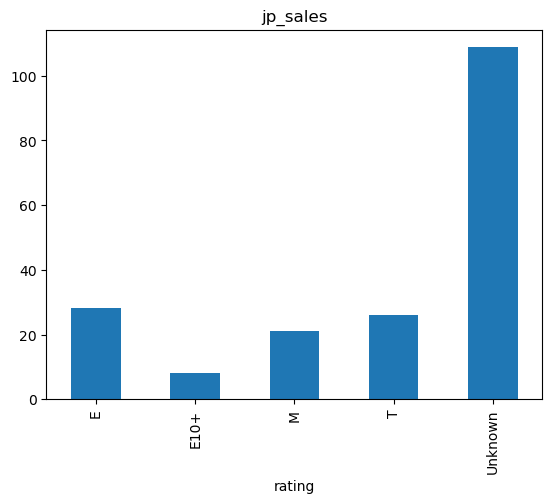

In [32]:
data_period.groupby('rating')['jp_sales'].sum().plot(kind = 'bar', title = 'jp_sales')

По построенным выше диаграммам можно сделать вывод о том, что рейтинг ESRB влияет на продажи в отдельном регионе. В Японии игры без рейтинга покупают чаще игр с рейтингами. А в Северной Америке и Европе чаще всего покупают игры с рейтингом M.

## ШАГ 5

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H_0: Средний пользовательский рейтинг(user_score) платформы Xbox One = среднему пользовательскому рейтингу платформы PC 
H_1: Средний пользовательский рейтинг(user_score) платформы Xbox One ≠ среднему пользовательскому рейтингу платформы PC 

In [33]:
data_temp = data_period.query('user_score!="tbd"')
data_temp['user_score'] = data_temp['user_score'].astype(float)


xbox = data_temp.loc[data_temp['platform'] =='XOne']['user_score']
pc = data_temp.loc[data_temp['platform'] =='PC']['user_score']


results = st.ttest_ind(xbox, pc, equal_var = False)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.8570492519273201
Не получилось отвергнуть нулевую гипотезу


Принимаем гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.
H_0: Средний пользовательский рейтинг(user_score) жанра "Action" = среднему пользовательскому рейтингу жанра "Sports"
H_1: Средний пользовательский рейтинг(user_score) жанра "Action" ≠ среднему пользовательскому рейтингу жанра "Sports"

In [34]:
data_temp1 = data_period.query('user_score!="tbd"')
data_temp1['user_score'] = data_temp1['user_score'].astype(float)

action = data_temp.loc[data_temp['genre'] =='Action']['user_score']
sports = data_temp.loc[data_temp['genre'] =='Sports']['user_score']


results = st.ttest_ind(action, sports, equal_var = False)
alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

5.390717684343475e-21
Отвергаем нулевую гипотезу


Принимаем гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза говорит о равенстве признаков, по которым сравниваем(user_score)
Альтернативная гипотеза противоположна, отрицает нулевую.
Для проверки гипотез применили гипотезу о равенстве средних двух генеральных совокупностей, т к требовалось сравнить средние значения двух независимых совокупностей.

## ШАГ 6

В ходе исследования определили, что:
- PS4 является потенциально прибыльной платформой;
- Платформы PS4, 3DS, PS3, X360, WiiU лидируют по продажам за последние 5 лет;
- Продажи PS3, X360, Wii, XOne, PSV упали к 2016 году.

Также были приняты гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные. Средние пользовательские рейтинги платформ Xbox One и PC также различаются.

На примере нескольких платформ убедились в слабой связи между продажами и оценками пользователей и критиков.

Определили самые прибыльные жанры: Shooter, Platform, Racing и Sports.
А также жанры с низкими продажами: Puzzle, Adventure, Strategy.

Сделали вывод о том, что рейтинг ESRB влияет на продажи в отдельном регионе. В Японии игры без рейтинга покупают чаще игр с рейтингами. А в Северной Америке и Европе чаще всего покупают игры с рейтингом M.

Сильных отличий в доле продаж по жанрам на разных континентах не наблюдается.

Доли продажи платформ в Северной Америке и Европе схожи. Доли продажи платформ в Японии отличаются от Северной Америки и Европы. Различие в долях продаж можно объяснить различиями в культуре и менталитете разных стран. 